In [2]:
import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import datetime as dt

import geopandas
from shapely.geometry import Point

import logging
import re

In [16]:
df = pd.read_json('../input/data.local/tza_hfr/advance-search.json')

# date_parser throws error on read_html
# parse_dates=['Date Opened'], date_parser=dateparse

In [10]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

,id,facility_identifier_number,facility_name,common_facility_name,latitude,longitude,incharge_first_name,incharge_middle_names,incharge_last_name,incharge_regno,incharge_nid,incharge_email,incharge_phone_no,doctor_in_charge_qualification,registration_status,operating_status,facility_type,ownership_category,ownership_details,ownership_authority,official_phone_no,requestor,admin_hierarchy_node_id,email,postal_address,postal_code,official_fax,website,operation_start_date,nearest_facility,nearest_facility_distance,ref_hosp_name,ref_hosp_distance,ref_hosp_owner,challenges_referral_pt,transport_referalpt,request_status,moh_authority,mtuha,ctc_id,registrar_id,msd_id,status
0,1417,113310-7,2001 GEM PLUS,,-2.563525,32.912659,Marco,Enos,Ngoso,,,None,None,1.0,7,Operating,Level IA2 (Dispensary Laboratory),Private,Marco Enos Ngoso,For Profit,0752339933,23211,TZ.LK.MZ.NA.3.12.3,marcoenos@gmail.com,P. O. Box 13 81,,,,2001-07-01,113336-2,1km,NULL,None,NULL,NaN,None,10,3,NaN,None,PHL-C/MWZ/AUT/06,None,Operating
1,1418,100017-3,202 KJ,,Not Set,Not Set,,,,,,None,None,0.0,0,Permanent closed,Dispensary,Public,None,Military,None,1,TZ.CL.DO.DO,,None,None,None,,None,None,None,NULL,None,NULL,NaN,None,10,1,NaN,None,None,None,Permanent closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12547,1820,108430-0,ZUNZULI,Zunzuli dispensary,-3.32421,32.83933,Julius,,Manunu,,,None,784399850,17.0,7,Operating,Dispensary,Public,None,LGA,None,1,TZ.WT.SY.SH.3.22.3,,None,None,None,,None,None,None,NULL,None,NULL,NaN,None,10,1,NaN,None,None,None,Operating
12548,1822,108431-8,ZUZU,Zuzu,-6.172144,35.640203,,,,,,None,764931444,0.0,7,Operating,Dispensary,Public,None,LGA,None,1,TZ.CL.DO.DO.5.24.1,,1249,None,None,,None,None,None,NULL,13 Km,NULL,NaN,Ambulance,10,1,NaN,None,None,None,Operating


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12549 entries, 0 to 12548
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12549 non-null  int64  
 1   facility_identifier_number      12549 non-null  object 
 2   facility_name                   12549 non-null  object 
 3   common_facility_name            12298 non-null  object 
 4   latitude                        10956 non-null  object 
 5   longitude                       10956 non-null  object 
 6   incharge_first_name             12149 non-null  object 
 7   incharge_middle_names           12149 non-null  object 
 8   incharge_last_name              12149 non-null  object 
 9   incharge_regno                  12149 non-null  object 
 10  incharge_nid                    12149 non-null  object 
 11  incharge_email                  2035 non-null   object 
 12  incharge_phone_no               

<AxesSubplot:>

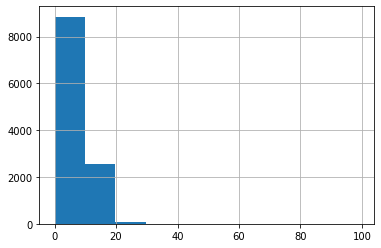

In [11]:
df['doctor_in_charge_qualification'].hist()

In [13]:
df['doctor_in_charge_qualification'].min()

0.0

In [12]:
df['doctor_in_charge_qualification'].max()

99.0

In [15]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df[df['doctor_in_charge_qualification'] == 99])


,id,facility_identifier_number,facility_name,common_facility_name,latitude,longitude,incharge_first_name,incharge_middle_names,incharge_last_name,incharge_regno,incharge_nid,incharge_email,incharge_phone_no,doctor_in_charge_qualification,registration_status,operating_status,facility_type,ownership_category,ownership_details,ownership_authority,official_phone_no,requestor,admin_hierarchy_node_id,email,postal_address,postal_code,official_fax,website,operation_start_date,nearest_facility,nearest_facility_distance,ref_hosp_name,ref_hosp_distance,ref_hosp_owner,challenges_referral_pt,transport_referalpt,request_status,moh_authority,mtuha,ctc_id,registrar_id,msd_id,status
3738,13908,120708-3,KAMEDA,KAMEDA,,,Lazaro,Njumbo,Jassely,2083,19850604-59109-00002-25,None,0757 374 205,99.0,7,Operating,PolyClinic,Private,KAMEDA CARE LIMITED,Company/Business Name,0745681946,10644,TZ.SH.NJ.WA.2.7.1,kamedadisp@gmail.com,P.O BOX 69,NJOMBE,,,2021-11-23,101597-3,1.1,NULL,NULL,NULL,NaN,None,10,2,NaN,None,None,None,Operating
